# Formation Data-Science: 
## Introduction au Machine learning (Jour 1)

Auteurs : Joseph Salmon, Alexandre Gramfort

Ce notebook contient les éléments d'introduction au machine learning

# I - Prétraitement et visualiation sur *digits*

## Imports et intialisation

In [1]:
%matplotlib inline                      

import numpy as np                      # charge un package pour le numérique
import matplotlib.pyplot as plt         # charge un package pour les graphiques

## Description du jeu de données:
On charge le jeu de données *digits* disponoible dans le package scikit-learn (nom d'import sklearn). Ce jeu de données contient des images de chiffres numérisés. On va s'en servir au cours de cette séance pour étudier les principaux enjeu en classification (supervisée).  

In [2]:
# Chargement des données disponible dans le package sklearn
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

print("Nombre de pixels :      {}".format(X.shape[1]))
print("Nombre d'observations : {}".format(X.shape[0]))
print("Nombre de classes :     {}".format(len(np.unique(y))))

# Choix d'une observation quelconques de la base
idx_to_test = 15

print("Affichage d'une ligne de la matrice / image:")
print(X[idx_to_test, :])
print("Affichage de la classe / chiffre associé:")
print(y[idx_to_test])

Nombre de pixels :      64
Nombre d'observations : 1797
Nombre de classes :     10
Affichage d'une ligne de la matrice / image:
[  0.   5.  12.  13.  16.  16.   2.   0.   0.  11.  16.  15.   8.   4.   0.
   0.   0.   8.  14.  11.   1.   0.   0.   0.   0.   8.  16.  16.  14.   0.
   0.   0.   0.   1.   6.   6.  16.   0.   0.   0.   0.   0.   0.   5.  16.
   3.   0.   0.   0.   1.   5.  15.  13.   0.   0.   0.   0.   4.  15.  16.
   2.   0.   0.   0.]
Affichage de la classe / chiffre associé:
5


## EXERCICE:
Faites varier le choix de l'indice. Sans afficher la classe arrivez-vous à reconnaitre le chiffre représenté?

In [3]:
np.sum(y == 1)

182

## Visualisation des observations:

Les images scannées sont de taille  8 x 8 et comportent donc 64 pixels chacune. Elles sont stockées sous la forme de vecteurs ligne, qu'il faut remettre dans un ordre lisible pour les identifiés. L'affichage graphique est proposé avec les commandes qui suivent.


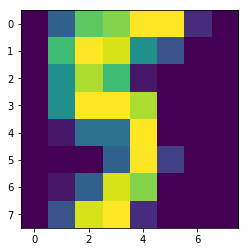

In [4]:
# Utilisation de la fonction imshow pour l'affichage de l'image numéro idx_to_test:
imgplot = plt.imshow(np.reshape(X[idx_to_test, :], (8, 8)))

Text(0.5,1,'Le chiffre numéro 15 est un 5')

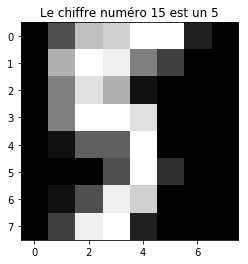

In [5]:
# Amélioration de la visualisation (niveau de gris) et de la légende:
imgplot = plt.imshow(np.reshape(X[idx_to_test, :], (8, 8)),
                     cmap='gray', aspect='equal', interpolation='nearest')

# Attention aux accents: ne pas oublier le u (Unicode) ci-dessous
plt.title(u'Le chiffre numéro %s est un %s' % (idx_to_test, y[idx_to_test]))

In [6]:
plt.imshow?


## Statistiques élementaires :
Pour mieux comprendre la base de données on va s'intéresser à quelques statistiques. 
On commence par calculer les moyennes et variances par classes pour chacun des chiffres. La moyenne par classe se visualise comme une image qui est une représentantion moyenne pour chaque chiffre de zéro à neuf. Idem pour la variance, ce qui permet alors de voir les parties avec les plus grandes variations entre les membres d'une même classe.


In [5]:
# Récupérer les modalités possible prises (Il y en a bien 10!) 
classes_list = np.unique(y).astype(int)
print "Liste des classes en présence: ", classes_list

Liste des classes en présence:  [0 1 2 3 4 5 6 7 8 9]


## EXERCICE:

- Calculer un représentant moyen du chiffre 0?
- Avec une boucle `for` calculer le représentant moyen pour chaque chiffre

## Solution

In [19]:
np.mean(X[y == 0, :], axis=0).shape

(64,)

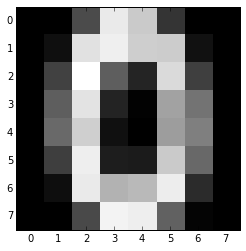

In [27]:
imgplot = plt.imshow(np.reshape(np.mean(X[y == 0, :], axis=0), (8, 8)),
                     cmap='gray', aspect='equal', interpolation='nearest')

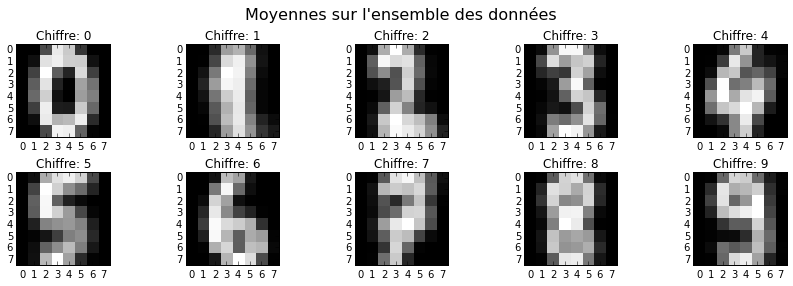

In [7]:
# Calculer un représentant moyen pour chaque chiffre 
Xi_mean = [np.mean(X[y == cls], axis=0) for cls in classes_list]

# Fonction d'affichage d'une liste d'image
def disp_pics(pic_list, title=''):
    """" Fonction qui affiche une liste d'image codée en vecteur """""
    fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 4))
    plt.suptitle(title, fontsize=16)
    for i in range(10):
        opt = dict(cmap='gray', aspect='equal', interpolation='nearest')
        axs.flat[i].imshow(pic_list[i].reshape(8, 8), **opt)
        axs.flat[i].set_title("Chiffre: %s" % i)
    # Contre-balancer l'affichage pas terrible de matplotlib
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)

# Affichage des images moyennes par classe pour les données  
disp_pics(Xi_mean, title=(u"Moyennes sur l'ensemble des données"))

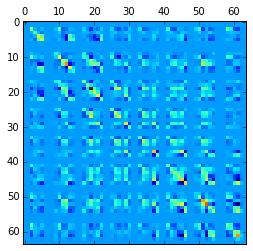

In [31]:
plt.matshow(np.cov(X[y == 0].T))

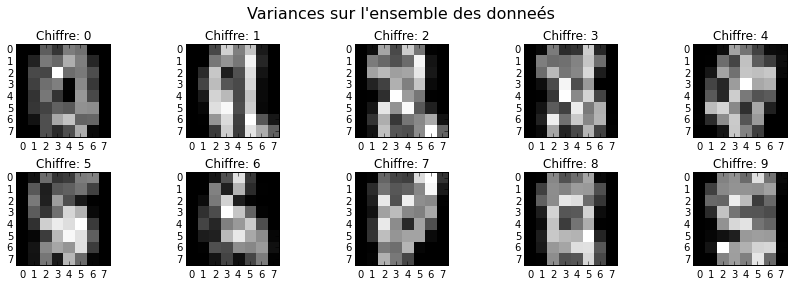

In [8]:
# Calculer de la variance par chiffre 
Xi_var = [np.var(X[y == cls], axis=0) for cls in classes_list]
# Affichage des images de variance par classe pour les données 
disp_pics(Xi_var, title=(u"Variances sur l'ensemble des donneés"))

# II - Premiers classifieurs

## Validation : découpage Apprentissage / Validation 

On procède de manière classique en réservant 80% des données pour la partie apprentissage, et 20% pour l'évaluation des classifieurs que l'on a construit sur la première partie.
En effet il n'est pas raisonnable de tester la perfromance sur 100% des données. Cela donnera lieux à du sur-apprentissage (en: overfitting). La généralisation des méthodes apprises serait alors très mauvaise

In [36]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                    random_state=42)
print("Nb d'échantillons d'apprentissage :  {}".format(X_train.shape[0]))
print("Nb d'échantillons de validation :    {}".format(X_test.shape[0]))


Nb d'échantillons d'apprentissage :  1437
Nb d'échantillons de validation :    360


(array([ 33.,  28.,  33.,  34.,  46.,  47.,  35.,  34.,  30.,  40.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

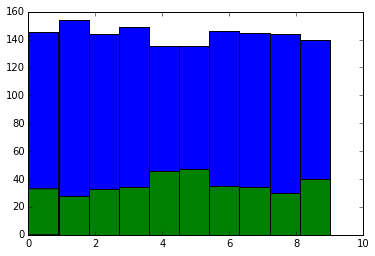

In [37]:
plt.hist(y_train, bins=10)
plt.hist(y_test, bins=10)

## Mesures de performance

In [38]:
from sklearn.lda import LDA

clf = LDA()                  # choix de la méthode LDA comme premier classifieur
clf.fit(X_train, y_train)      # calibration de la méthode sur nos données
y_pred = clf.predict(X_test)   # prédiction de la méthode sur la partie à tester

# Chargement d'une mesure standard de performance
from sklearn.metrics import accuracy_score

# accuracy : pourcentage de bonnes predictions
print "Accuracy       : ", accuracy_score(y_test, y_pred)
print "Accuracy bis:  : ", np.mean(y_test == y_pred) # mesure d'erreur 0/1

print("Le classifieur propose une bonne prédiction dans %s %% des cas."
      % (100 * accuracy_score(y_test, y_pred))) 

Accuracy       :  0.944444444444
Accuracy bis:  :  0.944444444444
Le classifieur propose une bonne prédiction dans 94.4444444444 % des cas.


/Users/alex/work/src/scikit-learn/sklearn/lda.py:374: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


## EXERCICE:

- Construire un classifieur "naif" qui prédirait chaque chiffre entre 0 et 9 avec probabilité 0.1 (on pourra utiliser la commande np.random.randint). Mesurer sa performance sur l'échantillon test.

## Correction:

In [42]:
y_rand = np.random.randint(10, size=y_test.shape)
accuracy_score(y_rand, y_pred)

0.083333333333333329

### Précision et rappel

In [50]:
# Choix d'un chiffre:
chf = 8
print "Chiffre choisi: %s " % chf

 Chiffre choisi: 8 


In [44]:
# Chargement de deux autres mesure de performance
from sklearn.metrics import precision_score, recall_score

In [53]:
# Calcul de la précision:
precision_value = precision_score(y_test, y_pred,average=None)

print "Precision     : ", precision_value[chf]
print "Precision bis : ", np.sum(np.logical_and(y_pred == chf, y_test == chf)) / float(np.sum(y_test == chf))

print("Le classifieur prédit le chiffre %s "
      " avec raison dans %s %% de ses prédictions.\n"
      "Autrement dit, dans %s %% de ses prédictions le classifieur prédit %s"
      " alors que le vrai chiffre est différent.\n" %
      (chf, 100 * precision_value[chf], 100 * (1 - precision_value[chf]), chf))

Precision     :  0.928571428571
Precision bis :  0.866666666667
Le classifieur prédit le chiffre 8  avec raison dans 92.8571428571 % de ses prédictions.
Autrement dit, dans 7.14285714286 % de ses prédictions le classifieur prédit 8 alors que le vrai chiffre est différent.



In [55]:
recall_score??

In [15]:
# Calcul du rappel:
recall_value = recall_score(y_test, y_pred, average=None) # en Anglais rappel = recall

print "Rappel     : ", recall_value[chf]
print "Rappel bis : ", np.mean(np.logical_and(y_pred == chf, y_test == chf))

print("Le classifieur prédit le chiffre %s avec raison dans %s"
      "%% des cas où le vrai chiffre est un %s.\n"
      "En revanche %s %% des chiffres qui sont vraiment des %s"
      " sont prédit à tord par un autre chiffre." %
      (chf, 100 * recall_value[chf], chf, 100 * (1 - recall_value[chf]), chf))

Rappel     :  0.974358974359
Rappel bis :  0.105555555556
Le classifieur prédit le chiffre 8 avec raison dans 97.4358974359% des cas où le vrai chiffre est un 8.
En revanche 2.5641025641 % des chiffres qui sont vraiment des 8 sont prédit à tord par un autre chiffre.


# EXERCICE: 
Afficher la précision et le rappel pour tous les valeurs de chiffre de 0 à 9 en utilisant une boucle "for" pour le classifieur que l'on vient de considérer.

## Résumé de ces éléments avec scikit-learn:

In [16]:
from sklearn.metrics import classification_report, f1_score

print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.96      1.00      0.98        27
          1       0.94      0.91      0.93        35
          2       1.00      0.92      0.96        36
          3       0.90      0.97      0.93        29
          4       0.97      0.97      0.97        30
          5       1.00      0.93      0.96        40
          6       1.00      0.98      0.99        44
          7       0.93      1.00      0.96        39
          8       0.90      0.97      0.94        39
          9       0.90      0.88      0.89        41

avg / total       0.95      0.95      0.95       360



# EXERCICE: 
Vérifier que la précision et le rappel moyen donnés dans le dernier tableau sont la moyenne de la précision et du rappel obtenus pour chaque chiffre. 

# III - Courbe d'apprentissage

Les courbes d'apprentissage permettent de quantifier le gain de performance obtenu en augmentant la taille des données. Cela permet de répondre à des questions comme:

- Ai-je assez de données?
- Mon modèle est-il assez complexe pour mon problème?

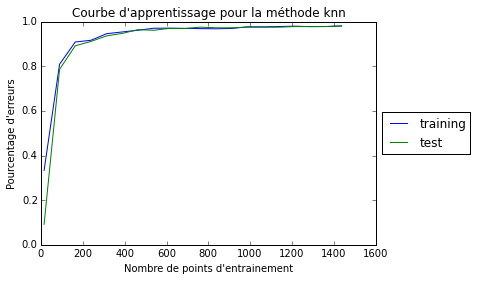

In [58]:
N_range = np.linspace(15, X_train.shape[0], 20).astype(int)

clf = LDA()   
clf_name = 'LDA'# choix de la méthode LDA comme premier classifieur

def plot_learning_curve(clf, clf_name):
    training_error = []
    test_error = []

    for N in N_range:
        XN = X_train[:N]
        yN = y_train[:N]
        clf.fit(XN, yN)        
        training_error.append(accuracy_score(clf.predict(XN), yN))
        test_error.append(accuracy_score(clf.predict(X_test), y_test))
    plt.figure()
    plt.plot(N_range, training_error, label='training')
    plt.plot(N_range, test_error, label='test')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(u'Courbe d\'apprentissage pour la méthode ' + clf_name)
    plt.xlabel('Nombre de points d\'entrainement')
    plt.ylabel('Pourcentage d\'erreurs')
    
#plot_learning_curve(clf, clf_name) 

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=15)
plot_learning_curve(clf, 'knn') 

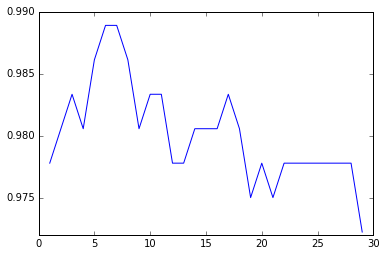

In [64]:
scores = []
neighbors_range = range(1, 30, 1)
for n_neighbors in neighbors_range:
    clf.n_neighbors = n_neighbors
    clf.fit(X_train, y_train)
    scores.append(accuracy_score(clf.predict(X_test), y_test))

plt.plot(neighbors_range, scores)

In [62]:
y_test.shape

(360,)

# IV - Comparaison de performances de classifieurs

In [67]:
# Chargement d'une autre méthode de classification (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Liste des classifieurs évalués
classifiers = [('LDA', LDA()),
               ('KNN_k=1', KNeighborsClassifier(n_neighbors=1))]

##  Calcul des métriques de performance

Pour chaque classifieur on évalue la performance par le score sur les données de test et le temps d'éxecution

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.grid_search import GridSearchCV

In [69]:
import pandas as pd        # charge un package pour le traitement des données
from timeit import timeit  # charge un package pour des mesures de temps


# Definition des métriques de performance
def perf_compute(clf, name, loops=10):
    """
    Calcule le temps d'apprentissage, de prediction, le score
    et la matrice de confusion d'un classifieur
    """
    # On initialise le conteneur
    perf = pd.Series(name=name)
    # On crée les callables qu'on passera à la fonction de profiling
    fit = lambda: clf.fit(X_train, y_train)
    score = lambda: clf.score(X_test, y_test)

    # On profile le temps des phases d'entrainement et de prédiction en ms
    perf['train_tps'] = timeit(fit, number=loops) / loops * 1000
    perf['test_tps'] = timeit(score, number=loops) / loops * 1000
    perf['total_tps'] = perf.train_tps + perf.test_tps
    # On calcule le score en pourcentage
    perf['score'] = fit().score(X_test, y_test) * 100
    # On calcule la matrice de confusion
    perf['conf_mat'] = [confusion_matrix(fit().predict(X_test), y_test)]
    # Normalisation par ligne de la matrice de confusion  pour avoir des pourcentages d'erreurs.
    # cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    return perf

In [70]:
# On lance le calcule de performance. On profile en bouclant 100 fois
perfs = pd.DataFrame([perf_compute(clf, name) for name, clf in classifiers])
perfs = perfs.sort('score')

perfs['train_tps test_tps total_tps score'.split()].T

,LDA,KNN_k=1
train_tps,8.186007,2.347398
test_tps,0.289893,51.403213
total_tps,8.475900,53.750610
score,94.444444,97.777778


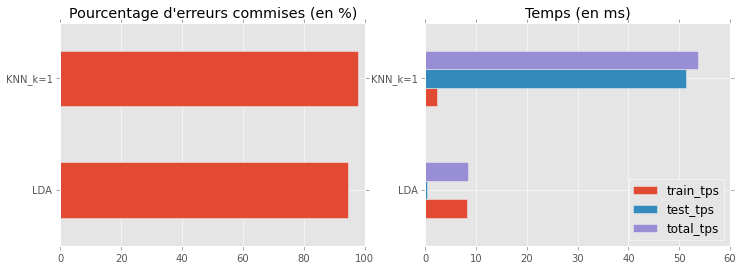

In [71]:
# Barplot des performances
plt.style.use('ggplot')    # sortie graphique améliorées (tester sans!)

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
perfs['score'].plot(kind='barh',
                    title='Pourcentage d\'erreurs commises (en %)',
                    ax=axs[0])
perfs[['train_tps', 'test_tps', 'total_tps']].plot(kind='barh',
                                                   title='Temps (en ms)',
                                                   ax=axs[1])

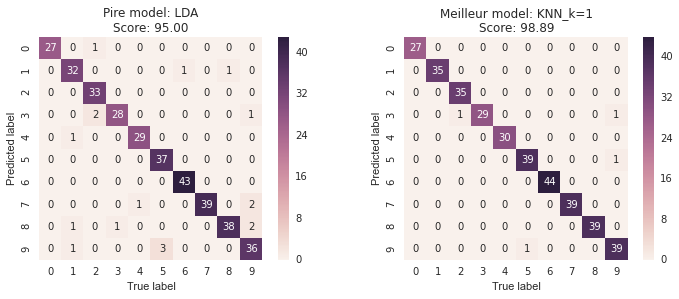

In [23]:
import seaborn as sns

def plot_conf_mat(perf, ax, title='Model'):
    """
    Affichage de la matrice de confusion
    """
    sns.heatmap(perf.conf_mat[0], ax=ax, square=True, annot=True)
    ax.set_title('{}: {}\nScore: {:.2f}'.format(title, perf.name, perf.score))
    ax.set_xlabel('True label')
    ax.set_ylabel('Predicted label')

# Affichage du plus mauvais et du meilleur classifieur
# Les classifieurs sont classés par scores croissant
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
plot_conf_mat(perfs.iloc[0], ax=axs[0], title='Pire model')
plot_conf_mat(perfs.iloc[-1], ax=axs[1], title='Meilleur model')

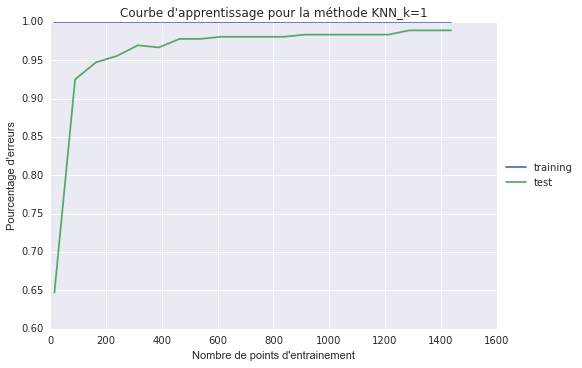

In [24]:
# courbe d'apprentissage pour KNN
plot_learning_curve(classifiers[1][1], classifiers[1][0])

# EXERCICE

* Tester d'autres modèles:

`from sklearn.naive_bayes import GaussianNB`

`from sklearn.svm import SVC`

`estimator = GaussianNB()`

`estimator = SVC(gamma=0.001)`


* Les résultats varient en fonction du découpage apprentissage/validation initial. Obtenez-vous des les même résultat :

    * en changeant la graine de l'aléa ('random_state=10')?

    * en changeant le ratio apprentissage/validation?

# EXERCICE

* Quelle valeur de k dans le k-NN donne la meilleure performance? Faire varier k entre 1 et 10 et afficher un graphique de performance en fonction de k.

* Il y a-t-il un compromis entre la performance de prédiction et le temps de calcul?

In [72]:
from sklearn.datasets import load_boston
boston = load_boston()
X, y = boston.data, boston.target

In [75]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

(array([  21.,   55.,   82.,  154.,   84.,   41.,   30.,    8.,   10.,   21.]),
 array([  5. ,   9.5,  14. ,  18.5,  23. ,  27.5,  32. ,  36.5,  41. ,
         45.5,  50. ]),
 <a list of 10 Patch objects>)

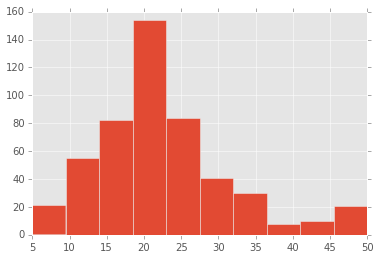

In [76]:
plt.hist(y)

In [101]:
AdaBoostRegressor?

In [105]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

# XX = scale(X)

# estimator = KNeighborsRegressor(n_neighbors=1)
estimator = RandomForestRegressor(n_estimators=100, max_depth=7, n_jobs=4)
# estimator = GradientBoostingRegressor()
# estimator = AdaBoostRegressor(base_estimator=estimator)

scores = cross_val_score(estimator, X, y, cv=5, scoring='mean_squared_error')
print np.sqrt(-np.mean(scores))

4.70427200106


In [90]:
np.std(X, axis=0)

array([  8.58828355e+00,   2.32993957e+01,   6.85357058e+00,
         2.53742935e-01,   1.15763115e-01,   7.01922514e-01,
         2.81210326e+01,   2.10362836e+00,   8.69865112e+00,
         1.68370495e+02,   2.16280519e+00,   9.12046075e+01,
         7.13400164e+00])